In [273]:
# Dependencies
import pandas as pd
csv_data = "survey_results_public.csv"
df = pd.read_csv(csv_data, encoding="utf-8")
print(df.shape)

(98855, 43)


C:\Users\msatyana\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


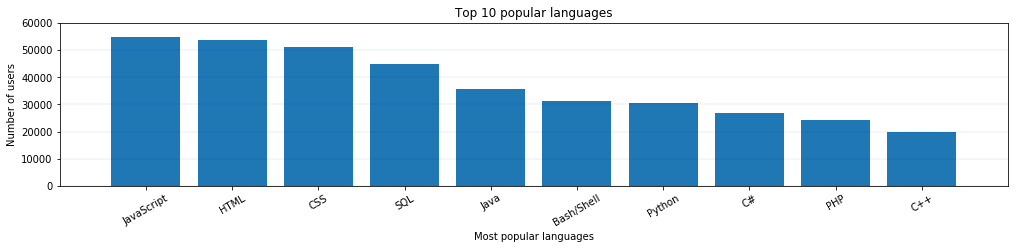

In [274]:
from collections import defaultdict
import operator
import matplotlib.pyplot as plt

lang_dict = {}
for i in lang:
    ind_lang = i.split(';')
    #print(ind_lang)
    for k in ind_lang:
        lang_dict[k] = lang_dict.get(k, 0) + 1

s_lang_dict = sorted(lang_dict.items(), key=operator.itemgetter(1), reverse=True)
# sorted_names = sorted(lang_dict, key=lambda x: lang_dict[x])
# sorted_names
x_axis = [i[0] for i in s_lang_dict]
y_axis = [i[1] for i in s_lang_dict]
x_axis = x_axis[:10]
top_lang = x_axis
y_axis = y_axis[:10]
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(17,3))
ax.bar(x_axis, y_axis)
ax.set_xlim(-1, 10)
ax.set_ylim(0, 60000)
ax.set_xlabel('Most popular languages')
ax.set_ylabel('Number of users')
ax.set_title('Top 10 popular languages')
ax.set_xticklabels(x_axis, rotation=30)
ax.yaxis.grid(True, which='major', linewidth=0.4,
                  color='blue', linestyle='-', alpha=0.2)
plt.show()

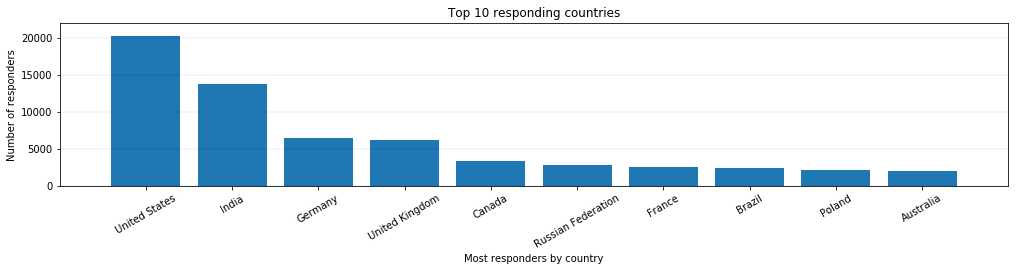

In [275]:
top_countries_df = df['Country'].value_counts().nlargest(10)
x_axis = top_countries_df.index.tolist()
top_countries = x_axis
y_axis = top_countries_df.tolist()
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(17,3))
ax.bar(x_axis, y_axis)
ax.set_xlim(-1, 10)
ax.set_ylim(0, 22000)
ax.set_xlabel('Most responders by country')
ax.set_ylabel('Number of responders')
ax.set_title('Top 10 responding countries')
ax.set_xticklabels(x_axis, rotation=30)
ax.yaxis.grid(True, which='major', linewidth=0.4,
                  color='blue', linestyle='-', alpha=0.2)
plt.show()

In [276]:
print(df.shape)
# lang = df['LanguageWorkedWith'].dropna()
# lang.head()

(98855, 43)


### Countrywise languages

In [287]:
df.head()
df.columns
cols = ['Country', 'ConvertedSalary', 'CareerSatisfaction', 'LanguageWorkedWith',
        'DatabaseWorkedWith', 'PlatformWorkedWith', 'FrameworkWorkedWith', 'OperatingSystem',
        'EducationParents', 'Age']

# Generate a sorted list of top 10 countries
sel_df = df[cols].copy()
sel_df_c = sel_df[sel_df['Country'].isin(x_axis)]
sel_df_c.sort_values(['Country'], inplace=True)
sel_df_c.head()

# Generate a list of popular languages by country
c1 = sel_df_c[['LanguageWorkedWith', 'Country']]
print(c1.shape)
c1.dropna(subset=['LanguageWorkedWith'], inplace=True)
print(c1.shape)
c1.head()

# c2 = c1.iloc[0:20]
# c3 = c2['LanguageWorkedWith'].str.split(';')
# c2.head()
# c3.values[0][0]
# #print(top_lang)

lang_df = pd.DataFrame(0, index=top_lang, columns=top_countries)

for cnt, i in enumerate (c1.itertuples()):
    #print(i[1])
    for j in i[1].split(';'):
        #print(f'{j} {i[2]}')
        if(j in top_lang):
            #print(lang_df.loc[j, i[2]])
            lang_df.loc[j, i[2]] = lang_df.loc[j, i[2]] + 1
#     if cnt > 2000:
#         break

lang_df

C:\Users\msatyana\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\msatyana\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(62189, 2)
(50274, 2)


,United States,India,Germany,United Kingdom,Canada,Russian Federation,France,Brazil,Poland,Australia
JavaScript,13126,6115,3402,3871,2111,1263,1439,1424,1081,1299
HTML,12479,6319,3438,3758,2032,1215,1407,1357,983,1237
CSS,11979,5873,3244,3588,1965,1153,1368,1294,941,1200
SQL,10597,4764,2860,3160,1649,1136,1154,1191,874,1047
Java,7155,5128,2833,1799,1239,816,951,987,706,591
Bash/Shell,9069,1956,2606,2336,1378,828,1021,647,663,795
Python,8324,2830,2143,2175,1340,798,876,693,609,686
C#,6383,2056,1700,2214,1079,721,570,645,600,709
PHP,3968,3070,1746,1419,798,537,775,704,416,463
C++,4058,2763,1615,1021,756,650,581,374,466,348


In [289]:
c1.to_csv("lang_country.csv")

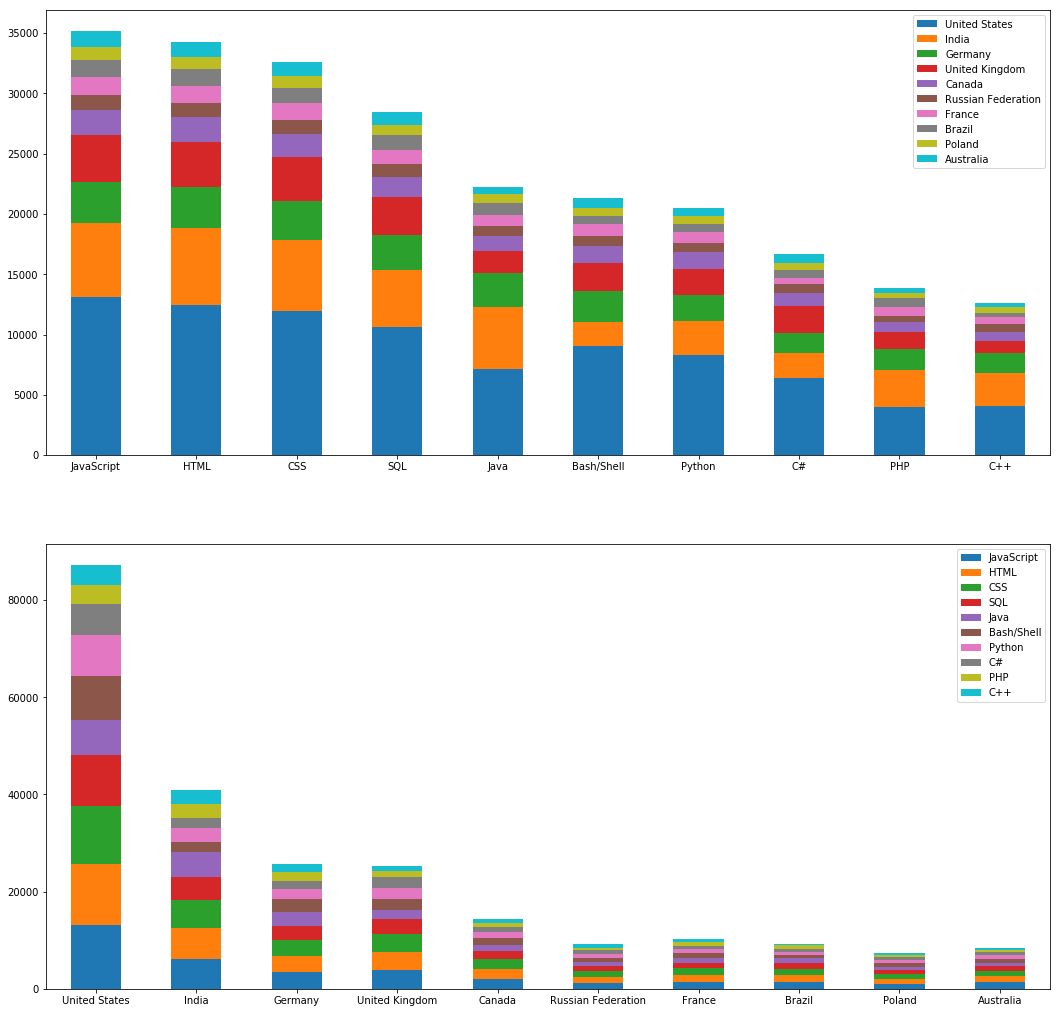

In [280]:
fig, ax_array = plt.subplots(2, 1, figsize=(18,18))
lang_df.plot(kind='bar', ax=ax_array[0], rot=0, stacked=True)
lang_df.T.plot(kind='bar', ax=ax_array[1], rot=0, stacked=True)

In [291]:
sel_df.shape

(98855, 10)

In [292]:
sel_df_c.columns

Index(['Country', 'ConvertedSalary', 'CareerSatisfaction',
       'LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith',
       'FrameworkWorkedWith', 'OperatingSystem', 'EducationParents', 'Age'],
      dtype='object')

In [296]:
sel_df_c['ConvertedSalary'].shape

(62189,)

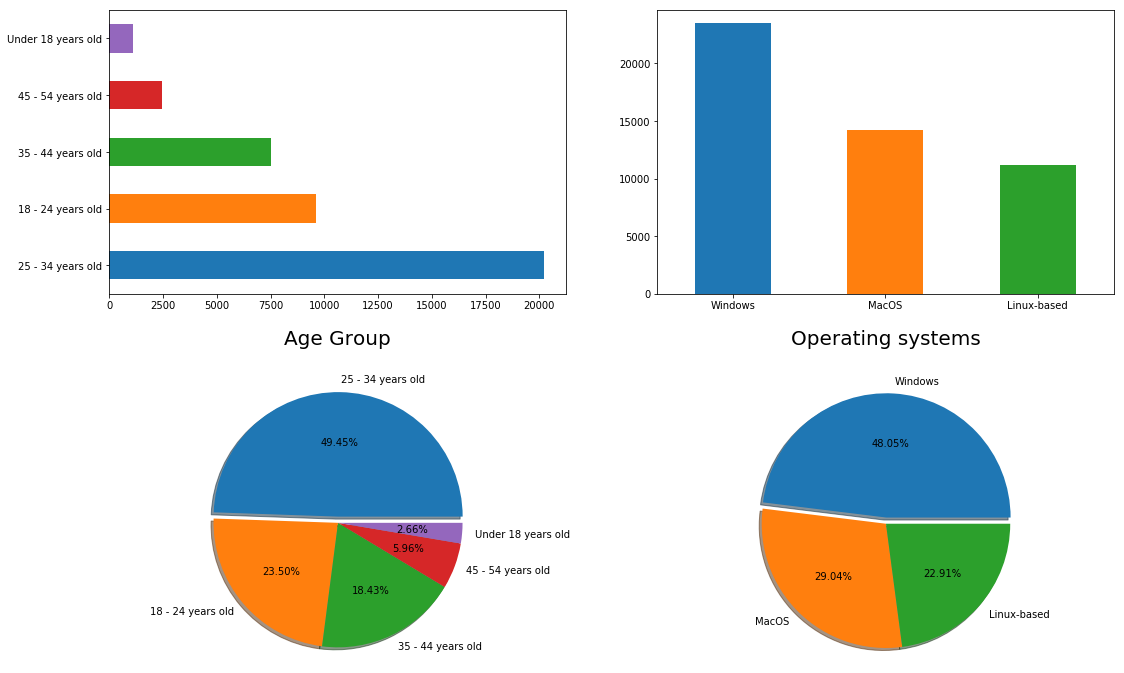

In [380]:
fig, ax = plt.subplots(2, 2, figsize=(18,12))
sel_df_c['Age'].value_counts().head(5).plot(kind='barh', ax=ax[0, 0])
explode = (0.05, 0, 0, 0, 0)
sel_df_c['Age'].value_counts().head(5).plot(kind='pie', ax=ax[1, 0], explode=explode, autopct='%.2f%%', title='Age Group', shadow=True)
ax[1, 0].axis('equal')
ax[1, 0].set_ylabel('')
ax[1, 0].title.set_position([0.5, 1.1])
ax[1, 0].title.set_size(20)
#  Indicates age group 25-44 is peak developer age
sel_df_c['OperatingSystem'].value_counts().head(3).plot(kind='bar', ax=ax[0, 1], rot=0)
explode = (0.05, 0, 0)
sel_df_c['OperatingSystem'].value_counts().head(3).plot(kind='pie', ax=ax[1, 1], explode=explode, autopct='%.2f%%', title='Operating systems', shadow=True)
ax[1, 1].axis('equal')
ax[1, 1].set_ylabel('')
ax[1, 1].title.set_position([0.5, 1.1])
# ax[1, 1].set_title('Title', pad=30)
ax[1, 1].title.set_size(20)
fig.subplots_adjust(hspace=.3)
plt.show()